In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
data = datasets.load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [62]:
x = data.data[:, :2]
y = data.target
target_names = data.target_names

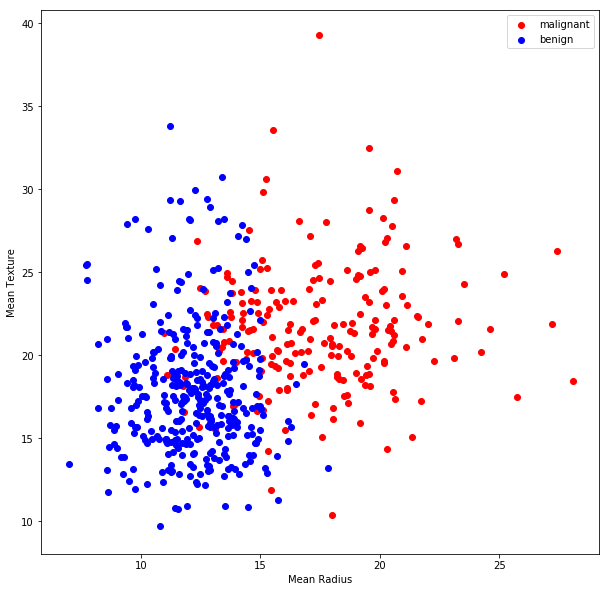

In [6]:
plt.figure(figsize = (10,10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x[y==i, 0], x[y == i, 1], color = color, label = target_name)
    
plt.legend()
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.show()

In [20]:
x = data.data
y = data.target
target_names = data.target_names

In [46]:
pca = PCA(n_components=2)
x_p = pca.fit(x).transform(x)
print("가장 큰 주성분 두 개에 대한 분산 : %s" % str(pca.explained_variance_ratio_))

가장 큰 주성분 두 개에 대한 분산 : [0.98204467 0.01617649]


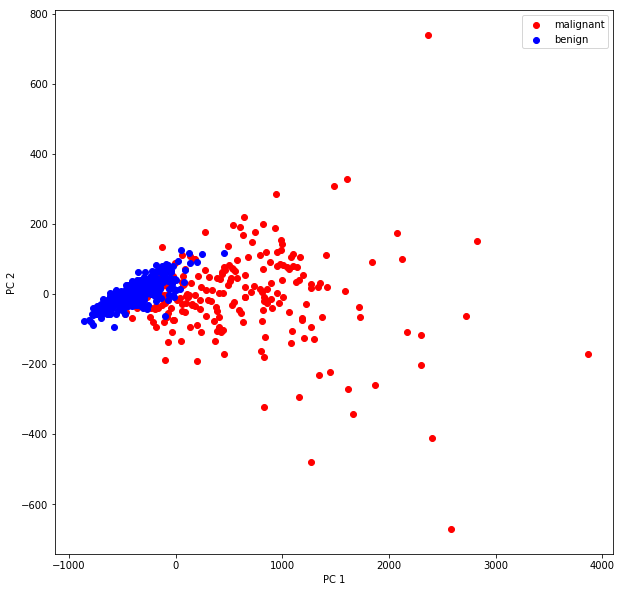

In [47]:
plt.figure(figsize = (10,10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_p[y==i, 0], x_p[y == i, 1], color = color, label = target_name)
    
plt.legend()
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [70]:
x = data.data
y = data.target
target_names = data.target_names

In [72]:
lda = LinearDiscriminantAnalysis(solver = 'eigen', n_components=2)
x_l = lda.fit(x,y).transform(x)

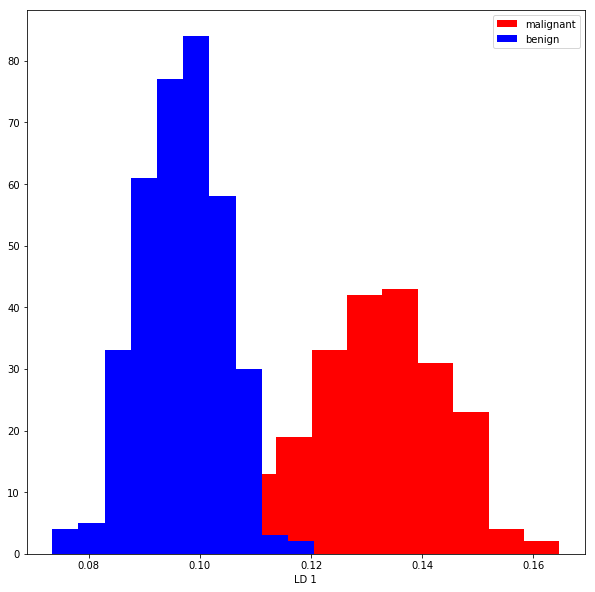

In [80]:
plt.figure(figsize=(10,10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.hist(x_l[y==i, 0], color = color, label = target_name)
    
plt.legend()
plt.xlabel("LD 1")
plt.show()

In [66]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1,2, 2, 3, 3])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y).transform(X)


array([[-8.88178420e-16,  1.04446594e+00],
       [-1.73205081e+00, -5.22232968e-01],
       [-1.73205081e+00,  5.22232968e-01],
       [ 8.88178420e-16, -1.04446594e+00],
       [ 1.73205081e+00,  5.22232968e-01],
       [ 1.73205081e+00, -5.22232968e-01]])

explained variance ratio (first two components): [0.92461621 0.05301557]


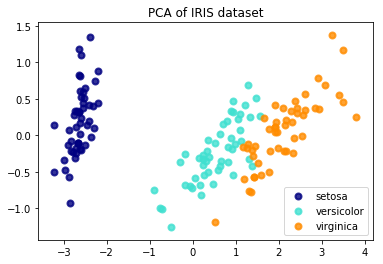

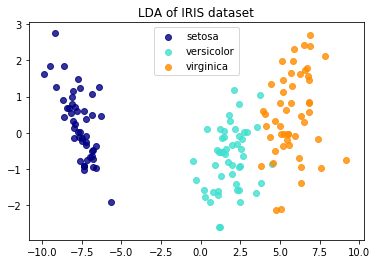

In [65]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()